In [1]:
import pandas as pd

# Import from the csv file via panda package
# Starting to cleaning the text data
dataFrame = pd.read_csv('taylor_swift_lyrics.csv', encoding = 'latin-1')

"""
 Oragnizing data with group chart title from panda package
 Aggrigate the lyrics and year together, however, the lyrics in one song need to be together
 Therefore, the " ".join(x) is for create a full version of lyrics in a song
 Besides, the songs are release in a period of year, as a result year:mean is used
 Reset index is for better selection and data frame manipulation
"""
songs = dataFrame.groupby('track_title').agg({'lyric': lambda x : " ".join(x), 'year': 'mean'}).reset_index()

# test the song header
# print(songs.head)

# check howmany songs do you have in the data frame
# print(len(songs))

# In order to peek into a lyrics of a song, adjust the colum width to show the data.
pd.options.display.max_categories = 5000
print(songs.head)

<bound method NDFrame.head of                track_title                                              lyric  \
0         ...Ready for It?  Knew he was a killer first time that I saw him...   
1                       22  It feels like a perfect night to dress up like...   
2   A Perfectly Good Heart  Why would you wanna break a perfectly good hea...   
3    A Place In This World  I don't know what I want, so don't ask me Caus...   
4             All Too Well  I walked through the door with you, the air wa...   
..                     ...                                                ...   
89          Wildest Dreams  He said, "Let's get out of this town Drive out...   
90              Wonderland  Flashing lights and we Took a wrong turn and w...   
91         You Are in Love  One look, dark room, meant just for you Time m...   
92      You Belong With Me  You're on the phone with your girlfriend, she'...   
93        You're Not Sorry  All this time I was wasting hoping you would c...  

In [2]:
len(songs)

94

In [3]:
# Import the module TfidfVectorizer from packcage sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
# Import module "stop words" from ntlk corpus
from nltk.corpus import stopwords
import nltk

stop_words = stopwords.words('english')
stop_words.extend(['back', 'said', 'come', 'things', 'get', 'one', 'oh', 'yeah', 'place', 'would', 'like', 'know', 'stay', 'go', 'let', 'cause'])
nltk.download('stopwords')
vectorizer = TfidfVectorizer(stop_words = stop_words, min_df = 0.05)

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
tfidf = vectorizer.fit_transform(songs['lyric'])

In [5]:
# Thhe relevance of topics and documents(a.k.a dataset)
from sklearn.decomposition import NMF

# Define how many topic would like to cover
nmf = NMF(n_components= 10)
topic_values = nmf.fit_transform(tfidf)

# loop through the nmf componensts in nmf object
for topic_num, topic in enumerate(nmf.components_):
    msg = "Topic #{}: ".format(topic_num + 1)
    msg += " ".join({vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10:-1]})
    print(msg)

Topic #1: knows got tell alone everybody trying girl home goes
Topic #2: heart perfectly way game wanna break good dance first
Topic #3: ever new fight knew never us found hold walked
Topic #4: alright best feeling night whole dancing hands dance first
Topic #5: ever ooh look made waiting whoa talk together never
Topic #6: love hate made save got time baby bad gonna
Topic #7: nice hope think song mad car months head home
Topic #8: ever want everything call easy hey better could people
Topic #9: love beautiful someone way life silence sad meet magic
Topic #10: remember sorry gone time see last standing still thought


In [6]:
# Scooping around the topics and assiged with lables
topic_labels = ['breakups', 'complain', 'arguments', 'party', 'regret', 'homesick', 'independence', 'curse', 'prase', 'memories']

In [7]:
# Allocating the relating topics and values together and arrange the topic_lables with the 10 topics
# totally 94 songs, and put the names to the columns
dataFrame_topics = pd.DataFrame(topic_values, columns=topic_labels)
print(dataFrame_topics)

breakups  complain  arguments     party    regret  homesick  independence  \
0   0.000000  0.000000   0.114410  0.113896  0.000000  0.154979      0.000000   
1   0.000000  0.000000   0.000000  0.598301  0.000000  0.000000      0.000989   
2   0.000000  0.601688   0.000000  0.000000  0.000000  0.000000      0.000000   
3   0.427220  0.000000   0.000000  0.000000  0.000000  0.000000      0.000000   
4   0.043895  0.027532   0.064105  0.022289  0.002239  0.000000      0.048952   
..       ...       ...        ...       ...       ...       ...           ...   
89  0.000000  0.014462   0.000000  0.049942  0.000000  0.000000      0.011364   
90  0.075546  0.000000   0.304602  0.000000  0.000000  0.047968      0.005090   
91  0.062779  0.010070   0.011258  0.057784  0.000000  0.000000      0.035139   
92  0.014741  0.000000   0.009496  0.042118  0.017665  0.048741      0.085294   
93  0.000000  0.046260   0.000000  0.000000  0.000000  0.098856      0.000000   

       curse     prase  memorie

In [8]:
# Combining the songs dataframe to the topics dataframe

songs = songs.join(dataFrame_topics)
# showing the result of the relevance between topics and songs.
songs.head()


,track_title,lyric,year,breakups,complain,arguments,party,regret,homesick,independence,curse,prase,memories
0,...Ready for It?,Knew he was a killer first time that I saw him...,2017,0.000000,0.000000,0.114410,0.113896,0.000000,0.154979,0.000000,0.0,0.000000,0.224408
1,22,It feels like a perfect night to dress up like...,2012,0.000000,0.000000,0.000000,0.598301,0.000000,0.000000,0.000989,0.0,0.001837,0.011953
2,A Perfectly Good Heart,Why would you wanna break a perfectly good hea...,2006,0.000000,0.601688,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,A Place In This World,"I don't know what I want, so don't ask me Caus...",2006,0.427220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,All Too Well,"I walked through the door with you, the air wa...",2012,0.043895,0.027532,0.064105,0.022289,0.002239,0.000000,0.048952,0.0,0.000000,0.354019


In [9]:
# Creating a threashold to filter out and set the value to 1 to reveal highly related topics
for topic in topic_labels:
    songs.loc[songs[topic] >= 0.1, topic] = 1
songs.head()

,track_title,lyric,year,breakups,complain,arguments,party,regret,homesick,independence,curse,prase,memories
0,...Ready for It?,Knew he was a killer first time that I saw him...,2017,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.0,0.000000,1.000000
1,22,It feels like a perfect night to dress up like...,2012,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000989,0.0,0.001837,0.011953
2,A Perfectly Good Heart,Why would you wanna break a perfectly good hea...,2006,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,A Place In This World,"I don't know what I want, so don't ask me Caus...",2006,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,All Too Well,"I walked through the door with you, the air wa...",2012,0.043895,0.027532,0.064105,0.022289,0.002239,0.0,0.048952,0.0,0.000000,1.000000


In [10]:
for topic in topic_labels:
    songs.loc[songs[topic] <= 0.1, topic] = 0
songs.head()

,track_title,lyric,year,breakups,complain,arguments,party,regret,homesick,independence,curse,prase,memories
0,...Ready for It?,Knew he was a killer first time that I saw him...,2017,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,22,It feels like a perfect night to dress up like...,2012,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A Perfectly Good Heart,Why would you wanna break a perfectly good hea...,2006,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A Place In This World,"I don't know what I want, so don't ask me Caus...",2006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,All Too Well,"I walked through the door with you, the air wa...",2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# Gourp by year and calculate the higly frequency of the related topics across different years
year_topics = songs.groupby('year').sum().reset_index()
print(year_topics)


year  breakups  complain  arguments  party  regret  homesick  independence  \
0  2006       3.0       2.0        3.0    0.0     0.0       2.0           3.0   
1  2008       1.0       2.0        5.0    2.0     1.0       1.0           2.0   
2  2010       2.0       1.0        5.0    1.0     3.0       3.0           2.0   
3  2012       2.0       2.0        5.0    3.0     2.0       2.0           3.0   
4  2014       3.0       1.0        5.0    2.0     1.0       6.0           2.0   
5  2017       1.0       2.0        3.0    3.0     3.0       6.0           4.0   

   curse  prase  memories  
0    2.0    3.0       3.0  
1    3.0    3.0       7.0  
2    3.0    6.0       8.0  
3    2.0    1.0       3.0  
4    3.0    2.0       3.0  
5    3.0    0.0       1.0  


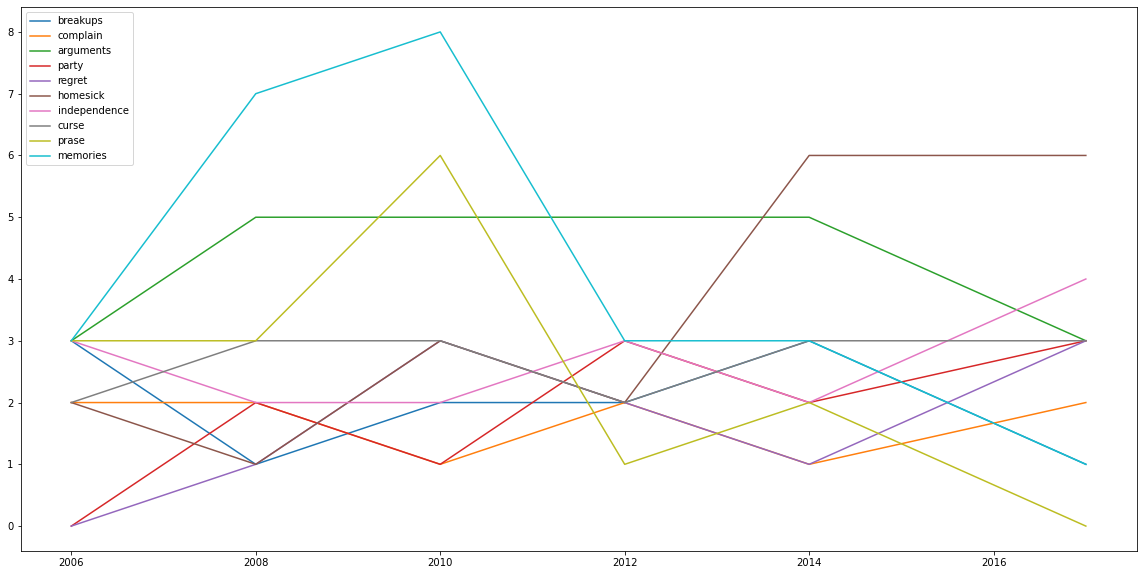

In [12]:
# Drawing pictures in python
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))

for i in topic_labels:
    plt.plot(year_topics['year'], year_topics[i], label = str(i))
plt.legend()